In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
train=pd.read_csv("C:\\Users\\rabhi\\OneDrive\\Documents\\traincredit.csv")

C:\Users\rabhi\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3444: DtypeWarning: Columns (26) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [3]:
train

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,0x1602,CUS_0xd40,January,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,_,809.98,26.822620,22 Years and 1 Months,No,49.574949,80.41529543900253,High_spent_Small_value_payments,312.49408867943663,Good
1,0x1603,CUS_0xd40,February,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.944960,NaN,No,49.574949,118.28022162236736,Low_spent_Large_value_payments,284.62916249607184,Good
2,0x1604,CUS_0xd40,March,Aaron Maashoh,-500,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,28.609352,22 Years and 3 Months,No,49.574949,81.699521264648,Low_spent_Medium_value_payments,331.2098628537912,Good
3,0x1605,CUS_0xd40,April,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.377862,22 Years and 4 Months,No,49.574949,199.4580743910713,Low_spent_Small_value_payments,223.45130972736786,Good
4,0x1606,CUS_0xd40,May,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,Good,809.98,24.797347,22 Years and 5 Months,No,49.574949,41.420153086217326,High_spent_Medium_value_payments,341.48923103222177,Good
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,0x25fe9,CUS_0x942c,April,Nicks,25,078-73-5990,Mechanic,39628.99,3359.415833,4,...,_,502.38,34.663572,31 Years and 6 Months,No,35.104023,60.97133255718485,High_spent_Large_value_payments,479.866228,Poor
99996,0x25fea,CUS_0x942c,May,Nicks,25,078-73-5990,Mechanic,39628.99,3359.415833,4,...,_,502.38,40.565631,31 Years and 7 Months,No,35.104023,54.18595028760385,High_spent_Medium_value_payments,496.65161,Poor
99997,0x25feb,CUS_0x942c,June,Nicks,25,078-73-5990,Mechanic,39628.99,3359.415833,4,...,Good,502.38,41.255522,31 Years and 8 Months,No,35.104023,24.02847744864441,High_spent_Large_value_payments,516.809083,Poor
99998,0x25fec,CUS_0x942c,July,Nicks,25,078-73-5990,Mechanic,39628.99,3359.415833,4,...,Good,502.38,33.638208,31 Years and 9 Months,No,35.104023,251.67258219721603,Low_spent_Large_value_payments,319.164979,Standard


In [4]:
train=train.drop(['SSN','Age'],axis=1)

In [5]:
train.isnull().sum()

ID                              0
Customer_ID                     0
Month                           0
Name                         9985
Occupation                      0
Annual_Income                   0
Monthly_Inhand_Salary       15002
Num_Bank_Accounts               0
Num_Credit_Card                 0
Interest_Rate                   0
Num_of_Loan                     0
Type_of_Loan                11408
Delay_from_due_date             0
Num_of_Delayed_Payment       7002
Changed_Credit_Limit            0
Num_Credit_Inquiries         1965
Credit_Mix                      0
Outstanding_Debt                0
Credit_Utilization_Ratio        0
Credit_History_Age           9030
Payment_of_Min_Amount           0
Total_EMI_per_month             0
Amount_invested_monthly      4479
Payment_Behaviour               0
Monthly_Balance              1200
Credit_Score                    0
dtype: int64

In [6]:
train=train.drop(['Name'],axis=1)

In [7]:
train = train.applymap(
    lambda x: x if x is np.NaN or not \
        isinstance(x, str) else str(x).strip('_')).replace(
            ['', 'nan', '!@9#%8', '#F%$D@*&8'], np.NaN
        )

In [8]:
train=train.fillna(method="bfill")

In [9]:
train

,ID,Customer_ID,Month,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,0x1602,CUS_0xd40,January,Scientist,19114.12,1824.843333,3,4,3,4,...,Good,809.98,26.822620,22 Years and 1 Months,No,49.574949,80.41529543900253,High_spent_Small_value_payments,312.49408867943663,Good
1,0x1603,CUS_0xd40,February,Scientist,19114.12,1824.843333,3,4,3,4,...,Good,809.98,31.944960,22 Years and 3 Months,No,49.574949,118.28022162236736,Low_spent_Large_value_payments,284.62916249607184,Good
2,0x1604,CUS_0xd40,March,Scientist,19114.12,1824.843333,3,4,3,4,...,Good,809.98,28.609352,22 Years and 3 Months,No,49.574949,81.699521264648,Low_spent_Medium_value_payments,331.2098628537912,Good
3,0x1605,CUS_0xd40,April,Scientist,19114.12,1824.843333,3,4,3,4,...,Good,809.98,31.377862,22 Years and 4 Months,No,49.574949,199.4580743910713,Low_spent_Small_value_payments,223.45130972736786,Good
4,0x1606,CUS_0xd40,May,Scientist,19114.12,1824.843333,3,4,3,4,...,Good,809.98,24.797347,22 Years and 5 Months,No,49.574949,41.420153086217326,High_spent_Medium_value_payments,341.48923103222177,Good
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,0x25fe9,CUS_0x942c,April,Mechanic,39628.99,3359.415833,4,6,7,2,...,Good,502.38,34.663572,31 Years and 6 Months,No,35.104023,60.97133255718485,High_spent_Large_value_payments,479.866228,Poor
99996,0x25fea,CUS_0x942c,May,Mechanic,39628.99,3359.415833,4,6,7,2,...,Good,502.38,40.565631,31 Years and 7 Months,No,35.104023,54.18595028760385,High_spent_Medium_value_payments,496.65161,Poor
99997,0x25feb,CUS_0x942c,June,Mechanic,39628.99,3359.415833,4,6,5729,2,...,Good,502.38,41.255522,31 Years and 8 Months,No,35.104023,24.02847744864441,High_spent_Large_value_payments,516.809083,Poor
99998,0x25fec,CUS_0x942c,July,Mechanic,39628.99,3359.415833,4,6,7,2,...,Good,502.38,33.638208,31 Years and 9 Months,No,35.104023,251.67258219721603,Low_spent_Large_value_payments,319.164979,Standard


In [10]:
test=pd.read_csv("C:\\Users\\rabhi\\OneDrive\\Documents\\testcredit2.csv")

In [11]:
test

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,0x237b,CUS_0x532d,June,Levinec,42,#F%$D@*&8,Writer,30232.28,2342.356667,5.0,...,_,1483.59,28.783918,31 Years and 10 Months,No,98.469454,203.78374953796475,Low_spent_Small_value_payments,221.98246305198276,Standard
1,0x2f62,CUS_0x27fb,May,NaN,40,410-50-2849,Manager,78477.18000000001,6412.765000,4.0,...,Standard,1197.91,33.257485,24 Years and 6 Months,Yes,123.317587,535.9615148534156,Low_spent_Medium_value_payments,261.9973983063893,Standard
2,0x1f7f,CUS_0x543f,June,NaN,23,333-87-6291,Mechanic,51824.94,4417.745000,6.0,...,Bad,2958.02,25.361167,7 Years and 8 Months,Yes,257.659454,113.3166443329007,High_spent_Small_value_payments,330.79840119634986,Poor
3,0x1c08,CUS_0x4aaa,July,NaN,42,676-15-0435,Architect,140014.36,11662.863333,3.0,...,Standard,1151.7,31.671289,17 Years and 7 Months,No,348.620396,572.3308454909459,Low_spent_Medium_value_payments,525.335091391654,Standard
4,0x2b07,CUS_0x6514,June,Gonzalezf,32,007-68-4311,_______,59438.91_,5086.242500,6.0,...,_,2259.86,34.660179,9 Years and 6 Months,Yes,362.270497,183.91258836561886,High_spent_Medium_value_payments,212.4411647251316,Standard
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1688,0x2058,CUS_0x76e7,July,env,26,532-39-3348,Manager,34128.92,2740.076667,6.0,...,Bad,2626.28,28.075933,5 Years and 11 Months,NM,118.066855,54.71738078805525,High_spent_Small_value_payments,361.2234312364412,Poor
1689,0x2a14,CUS_0x4d26,March,NaN,1206,133-18-6855,Architect,20978.49,1853.207500,6.0,...,Standard,2305.13,35.828550,7 Years and 11 Months,NM,28.452848,155.21680142833932,Low_spent_Medium_value_payments,281.65110103766256,Poor
1690,0x1c87,CUS_0x64f1,February,Michael Ermanl,26,955-39-6420,Entrepreneur,118487.16,9810.930000,8.0,...,Standard,140.26,36.909066,31 Years and 5 Months,No,301.560868,361.42718879840623,Low_spent_Medium_value_payments,598.1049429560193,Standard
1691,0x3948,CUS_0xafb,July,Zahariag,36,027-97-5117,Accountant,16564.89,1479.784565,8.0,...,Standard,1382.82,37.960858,11 Years and 7 Months,Yes,189.725495,124.97318411695709,Low_spent_Small_value_payments,249.365005601726,Good


In [12]:
test=test.drop(['SSN','Age'],axis=1)

In [13]:
test.isnull().sum()

ID                            0
Customer_ID                   0
Month                         0
Name                        148
Occupation                    0
Annual_Income                 0
Monthly_Inhand_Salary       260
Num_Bank_Accounts             0
Num_Credit_Card               0
Interest_Rate                 0
Num_of_Loan                   0
Type_of_Loan                205
Delay_from_due_date           0
Num_of_Delayed_Payment      128
Changed_Credit_Limit          0
Num_Credit_Inquiries         26
Credit_Mix                    0
Outstanding_Debt              0
Credit_Utilization_Ratio      0
Credit_History_Age          154
Payment_of_Min_Amount         0
Total_EMI_per_month           0
Amount_invested_monthly      75
Payment_Behaviour             0
Monthly_Balance              23
Credit_Score                  0
dtype: int64

In [14]:
test=test.drop(['Name'],axis=1)

In [15]:
test = test.applymap(
    lambda x: x if x is np.NaN or not \
        isinstance(x, str) else str(x).strip('_')).replace(
            ['', 'nan', '!@9#%8', '#F%$D@*&8'], np.NaN
        )

In [16]:
test=test.fillna(method="bfill")

In [17]:
test

,ID,Customer_ID,Month,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,0x237b,CUS_0x532d,June,Writer,30232.28,2342.356667,5.0,3.0,4.0,4,...,Standard,1483.59,28.783918,31 Years and 10 Months,No,98.469454,203.78374953796475,Low_spent_Small_value_payments,221.98246305198276,Standard
1,0x2f62,CUS_0x27fb,May,Manager,78477.18000000001,6412.765000,4.0,5.0,16.0,2,...,Standard,1197.91,33.257485,24 Years and 6 Months,Yes,123.317587,535.9615148534156,Low_spent_Medium_value_payments,261.9973983063893,Standard
2,0x1f7f,CUS_0x543f,June,Mechanic,51824.94,4417.745000,6.0,7.0,26.0,8,...,Bad,2958.02,25.361167,7 Years and 8 Months,Yes,257.659454,113.3166443329007,High_spent_Small_value_payments,330.79840119634986,Poor
3,0x1c08,CUS_0x4aaa,July,Architect,140014.36,11662.863333,3.0,7.0,18.0,4,...,Standard,1151.7,31.671289,17 Years and 7 Months,No,348.620396,572.3308454909459,Low_spent_Medium_value_payments,525.335091391654,Standard
4,0x2b07,CUS_0x6514,June,Developer,59438.91,5086.242500,6.0,7.0,33.0,9,...,Good,2259.86,34.660179,9 Years and 6 Months,Yes,362.270497,183.91258836561886,High_spent_Medium_value_payments,212.4411647251316,Standard
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1688,0x2058,CUS_0x76e7,July,Manager,34128.92,2740.076667,6.0,8.0,31.0,6,...,Bad,2626.28,28.075933,5 Years and 11 Months,NM,118.066855,54.71738078805525,High_spent_Small_value_payments,361.2234312364412,Poor
1689,0x2a14,CUS_0x4d26,March,Architect,20978.49,1853.207500,6.0,10.0,20.0,3,...,Standard,2305.13,35.828550,7 Years and 11 Months,NM,28.452848,155.21680142833932,Low_spent_Medium_value_payments,281.65110103766256,Poor
1690,0x1c87,CUS_0x64f1,February,Entrepreneur,118487.16,9810.930000,8.0,4.0,20.0,4,...,Standard,140.26,36.909066,31 Years and 5 Months,No,301.560868,361.42718879840623,Low_spent_Medium_value_payments,598.1049429560193,Standard
1691,0x3948,CUS_0xafb,July,Accountant,16564.89,1479.784565,8.0,5.0,12.0,39,...,Standard,1382.82,37.960858,11 Years and 7 Months,Yes,189.725495,124.97318411695709,Low_spent_Small_value_payments,249.365005601726,Good


In [18]:
train['Annual_Income']=train['Annual_Income'].astype(float)
test['Annual_Income']=test['Annual_Income'].astype(float)

In [19]:
from sklearn.preprocessing import StandardScaler
s=StandardScaler()

In [20]:
objLis = train.select_dtypes(exclude = "object").columns

In [21]:
for feat in objLis:
    train[feat] = s.fit_transform(train[feat].to_numpy().reshape(-1,1))

In [22]:
train

,ID,Customer_ID,Month,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,0x1602,CUS_0xd40,January,Scientist,-0.110031,-0.744951,-0.120024,-0.143150,-0.148934,4,...,Good,809.98,-1.067562,22 Years and 1 Months,No,-0.162960,80.41529543900253,High_spent_Small_value_payments,312.49408867943663,Good
1,0x1603,CUS_0xd40,February,Scientist,-0.110031,-0.744951,-0.120024,-0.143150,-0.148934,4,...,Good,809.98,-0.066489,22 Years and 3 Months,No,-0.162960,118.28022162236736,Low_spent_Large_value_payments,284.62916249607184,Good
2,0x1604,CUS_0xd40,March,Scientist,-0.110031,-0.744951,-0.120024,-0.143150,-0.148934,4,...,Good,809.98,-0.718376,22 Years and 3 Months,No,-0.162960,81.699521264648,Low_spent_Medium_value_payments,331.2098628537912,Good
3,0x1605,CUS_0xd40,April,Scientist,-0.110031,-0.744951,-0.120024,-0.143150,-0.148934,4,...,Good,809.98,-0.177318,22 Years and 4 Months,No,-0.162960,199.4580743910713,Low_spent_Small_value_payments,223.45130972736786,Good
4,0x1606,CUS_0xd40,May,Scientist,-0.110031,-0.744951,-0.120024,-0.143150,-0.148934,4,...,Good,809.98,-1.463366,22 Years and 5 Months,No,-0.162960,41.420153086217326,High_spent_Medium_value_payments,341.48923103222177,Good
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,0x25fe9,CUS_0x942c,April,Mechanic,-0.095681,-0.263267,-0.111506,-0.127653,-0.140358,2,...,Good,502.38,0.464817,31 Years and 6 Months,No,-0.164702,60.97133255718485,High_spent_Large_value_payments,479.866228,Poor
99996,0x25fea,CUS_0x942c,May,Mechanic,-0.095681,-0.263267,-0.111506,-0.127653,-0.140358,2,...,Good,502.38,1.618273,31 Years and 7 Months,No,-0.164702,54.18595028760385,High_spent_Medium_value_payments,496.65161,Poor
99997,0x25feb,CUS_0x942c,June,Mechanic,-0.095681,-0.263267,-0.111506,-0.127653,12.127547,2,...,Good,502.38,1.753100,31 Years and 8 Months,No,-0.164702,24.02847744864441,High_spent_Large_value_payments,516.809083,Poor
99998,0x25fec,CUS_0x942c,July,Mechanic,-0.095681,-0.263267,-0.111506,-0.127653,-0.140358,2,...,Good,502.38,0.264427,31 Years and 9 Months,No,-0.164702,251.67258219721603,Low_spent_Large_value_payments,319.164979,Standard


In [23]:
objLis1 = test.select_dtypes(exclude = "object").columns

In [24]:
for feat in objLis1:
    test[feat] = s.fit_transform(test[feat].to_numpy().reshape(-1,1))

In [25]:
test

,ID,Customer_ID,Month,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,0x237b,CUS_0x532d,June,Writer,-0.091750,-0.608041,-0.100743,-0.142113,-0.142604,4,...,Standard,1483.59,-0.701637,31 Years and 10 Months,No,-0.147181,203.78374953796475,Low_spent_Small_value_payments,221.98246305198276,Standard
1,0x2f62,CUS_0x27fb,May,Manager,-0.049304,0.653045,-0.109742,-0.125251,-0.112401,2,...,Standard,1197.91,0.166554,24 Years and 6 Months,Yes,-0.143877,535.9615148534156,Low_spent_Medium_value_payments,261.9973983063893,Standard
2,0x1f7f,CUS_0x543f,June,Mechanic,-0.072753,0.034952,-0.091743,-0.108389,-0.087231,8,...,Bad,2958.02,-1.365896,7 Years and 8 Months,Yes,-0.126014,113.3166443329007,High_spent_Small_value_payments,330.79840119634986,Poor
3,0x1c08,CUS_0x4aaa,July,Architect,0.004838,2.279620,-0.118741,-0.108389,-0.107367,4,...,Standard,1151.7,-0.141281,17 Years and 7 Months,No,-0.113919,572.3308454909459,Low_spent_Medium_value_payments,525.335091391654,Standard
4,0x2b07,CUS_0x6514,June,Developer,-0.066054,0.242065,-0.091743,-0.108389,-0.069612,9,...,Good,2259.86,0.438777,9 Years and 6 Months,Yes,-0.112104,183.91258836561886,High_spent_Medium_value_payments,212.4411647251316,Standard
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1688,0x2058,CUS_0x76e7,July,Manager,-0.088322,-0.484820,-0.091743,-0.099958,-0.074646,6,...,Bad,2626.28,-0.839037,5 Years and 11 Months,NM,-0.144575,54.71738078805525,High_spent_Small_value_payments,361.2234312364412,Poor
1689,0x2a14,CUS_0x4d26,March,Architect,-0.099892,-0.759588,-0.091743,-0.083096,-0.102333,3,...,Standard,2305.13,0.665525,7 Years and 11 Months,NM,-0.156491,155.21680142833932,Low_spent_Medium_value_payments,281.65110103766256,Poor
1690,0x1c87,CUS_0x64f1,February,Entrepreneur,-0.014102,1.705858,-0.073744,-0.133682,-0.102333,4,...,Standard,140.26,0.875222,31 Years and 5 Months,No,-0.120177,361.42718879840623,Low_spent_Medium_value_payments,598.1049429560193,Standard
1691,0x3948,CUS_0xafb,July,Accountant,-0.103775,-0.875281,-0.073744,-0.125251,-0.122468,39,...,Standard,1382.82,1.079345,11 Years and 7 Months,Yes,-0.135047,124.97318411695709,Low_spent_Small_value_payments,249.365005601726,Good


In [26]:
objList = train.select_dtypes(include = "object").columns
print (objList)

Index(['ID', 'Customer_ID', 'Month', 'Occupation', 'Num_of_Loan',
       'Type_of_Loan', 'Num_of_Delayed_Payment', 'Changed_Credit_Limit',
       'Credit_Mix', 'Outstanding_Debt', 'Credit_History_Age',
       'Payment_of_Min_Amount', 'Amount_invested_monthly', 'Payment_Behaviour',
       'Monthly_Balance', 'Credit_Score'],
      dtype='object')


In [27]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

for feat in objList:
    train[feat] = le.fit_transform(train[feat].astype(str))

print (train.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 25 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   ID                        100000 non-null  int32  
 1   Customer_ID               100000 non-null  int32  
 2   Month                     100000 non-null  int32  
 3   Occupation                100000 non-null  int32  
 4   Annual_Income             100000 non-null  float64
 5   Monthly_Inhand_Salary     100000 non-null  float64
 6   Num_Bank_Accounts         100000 non-null  float64
 7   Num_Credit_Card           100000 non-null  float64
 8   Interest_Rate             100000 non-null  float64
 9   Num_of_Loan               100000 non-null  int32  
 10  Type_of_Loan              100000 non-null  int32  
 11  Delay_from_due_date       100000 non-null  float64
 12  Num_of_Delayed_Payment    100000 non-null  int32  
 13  Changed_Credit_Limit      100000 non-null  in

In [28]:
objList1 = test.select_dtypes(include = "object").columns
print (objList1)

Index(['ID', 'Customer_ID', 'Month', 'Occupation', 'Num_of_Loan',
       'Type_of_Loan', 'Num_of_Delayed_Payment', 'Changed_Credit_Limit',
       'Credit_Mix', 'Outstanding_Debt', 'Credit_History_Age',
       'Payment_of_Min_Amount', 'Amount_invested_monthly', 'Payment_Behaviour',
       'Monthly_Balance', 'Credit_Score'],
      dtype='object')


In [29]:
for feat in objList1:
    test[feat] = le.fit_transform(test[feat].astype(str))

print (test.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1693 entries, 0 to 1692
Data columns (total 25 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ID                        1693 non-null   int32  
 1   Customer_ID               1693 non-null   int32  
 2   Month                     1693 non-null   int32  
 3   Occupation                1693 non-null   int32  
 4   Annual_Income             1693 non-null   float64
 5   Monthly_Inhand_Salary     1693 non-null   float64
 6   Num_Bank_Accounts         1693 non-null   float64
 7   Num_Credit_Card           1693 non-null   float64
 8   Interest_Rate             1693 non-null   float64
 9   Num_of_Loan               1693 non-null   int32  
 10  Type_of_Loan              1693 non-null   int32  
 11  Delay_from_due_date       1693 non-null   float64
 12  Num_of_Delayed_Payment    1693 non-null   int32  
 13  Changed_Credit_Limit      1693 non-null   int32  
 14  Num_Cred

In [30]:
x_train=train.drop(['Credit_Score'],axis=1)

In [31]:
y_train=train['Credit_Score']

In [32]:
x_test=test.drop(['Credit_Score'],axis=1)
y_test=test['Credit_Score']

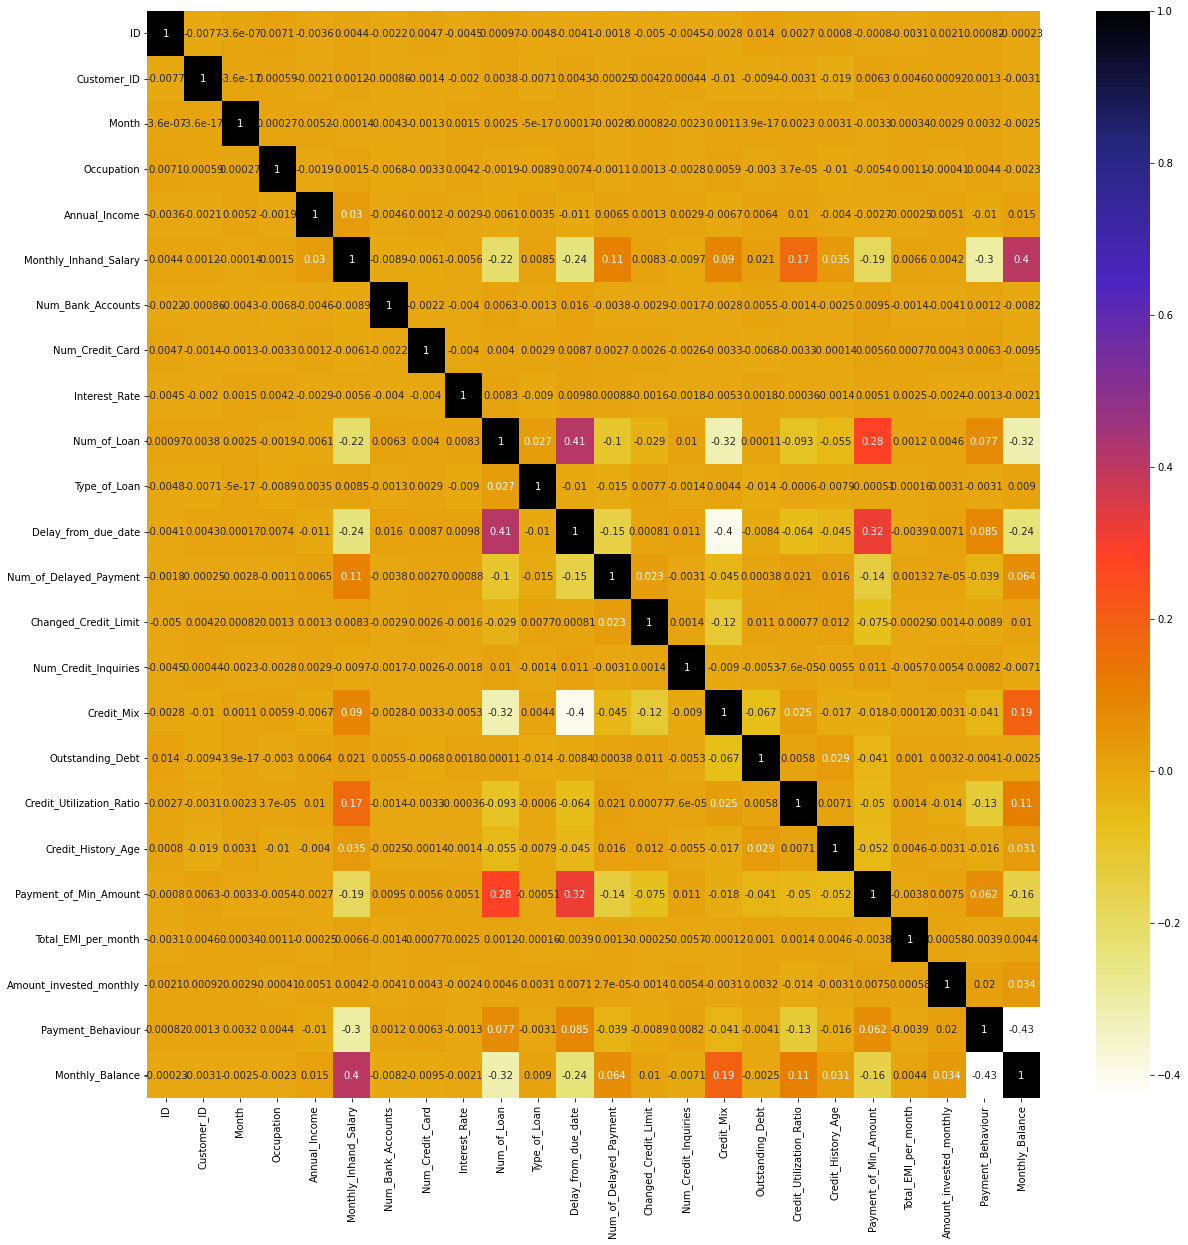

In [33]:
plt.figure(figsize=(20,20))
cor=x_train.corr()
sns.heatmap(cor,annot=True,cmap=plt.cm.CMRmap_r)
plt.show()

In [34]:
def correlation(dataset, threshold):
    col_corr = set()  # Set of all the names of correlated columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if (corr_matrix.iloc[i, j]) > threshold: # we are interested in absolute coeff value
                colname = corr_matrix.columns[i]  # getting the name of column
                col_corr.add(colname)
    return col_corr

In [35]:
corr_features = correlation(x_train, 0.70)
len(set(corr_features))

0

In [36]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
lr.fit(x_train,y_train)

C:\Users\rabhi\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [37]:
y_pred_lr=lr.predict(x_test)
print("Predicted Credit_Score: {}".format(y_pred_lr))

Predicted Credit_Score: [2 1 2 ... 2 1 2]


In [38]:
check=pd.DataFrame({"Actual":y_test,"Predicted":y_pred_lr})
check

,Actual,Predicted
0,2,2
1,2,1
2,1,2
3,2,1
4,2,2
...,...,...
1688,1,2
1689,1,2
1690,2,2
1691,0,1


In [39]:
check['Predicted'].unique()

array([2, 1])

In [40]:
lr.score(x_test,y_test)*100

51.50620200826934